In [2]:
%reset -f
import sys
sys.path.insert(0,'..')
from wavhandler import *
# from utils_train import train_test_val_split
from pandas.plotting import register_matplotlib_converters
from utils_train import test_inds, test_days
register_matplotlib_converters()

In [3]:
data = Dataset('Wingbeats')
print(data.target_classes)

def train_test_filenames(dataset, species, train_dates=[], test_dates=[]):
    dataset.read(species, loadmat=False)
    dataset.get_sensor_features()
    sub = dataset.df_features
    sub.groupby('datestr')['filenames'].count().plot(kind="bar")
    print(sub['datestr'].unique().tolist())

    test_fnames = sub[sub.datestr.isin(test_dates)].filenames
    if len(train_dates): # if train dates are given
        train_fnames = sub[sub.datestr.isin(train_dates)].filenames
    else:
        train_fnames = sub[~sub.datestr.isin(test_dates)].filenames

    print("{} train filenames, {} test filenames".format(train_fnames.shape[0], test_fnames.shape[0]))
    return train_fnames, test_fnames

['Ae. aegypti', 'Ae. albopictus', 'An. arabiensis', 'An. gambiae', 'C. pipiens', 'C. quinquefasciatus']


### Ae. Aegypti

Data: Ae. aegypti.
Read 85553 filenames in 2.31 seconds.
['20170209', '20170208', '20170210', '20170206', '20170213', '20170211', '20170207', '20161213', '20170212', '20161212']
82989 train filenames, 2564 test filenames


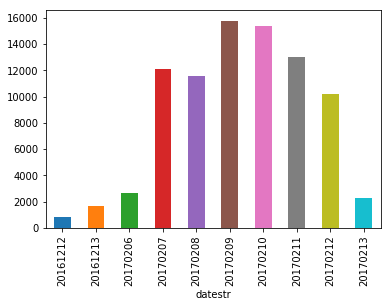

In [4]:
x1_tr, x1_ts = train_test_filenames(data,'Ae. aegypti', test_dates=['20161213','20161212'])

### Ae. albopictus

Data: Ae. albopictus.
Read 20231 filenames in 2.39 seconds.
['20170301', '20170228', '20170227', '20170103', '20170102']
17440 train filenames, 2791 test filenames


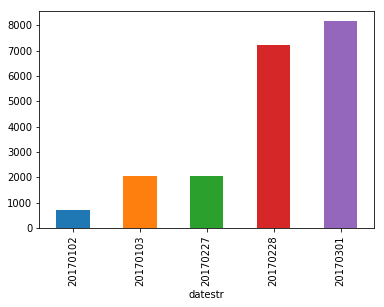

In [5]:
x2_tr, x2_ts = train_test_filenames(data,'Ae. albopictus', test_dates=['20170103', '20170102'])

### An. arabiensis

Data: An. arabiensis.
Read 19297 filenames in 2.30 seconds.
['20170313', '20170202', '20170315', '20170314', '20170318', '20170204', '20170201', '20170131', '20170203', '20170317', '20170320', '20170319', '20170316', '20170205', '20170206', '20170130']
12897 train filenames, 2831 test filenames


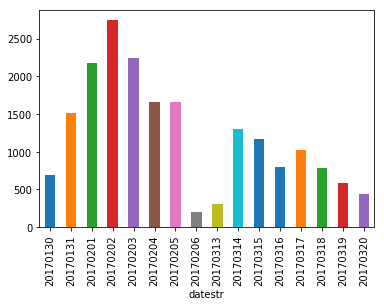

In [6]:
x3_tr, x3_ts = train_test_filenames(data,'An. arabiensis', test_dates=['20170319','20170320',
                                                                       '20170318','20170317'], train_dates=['20170201','20170202', '20170203','20170204',
                                                                                                            '20170205','20170206','20170131','20170130'])

### An. gambiae

Data: An. gambiae.
Read 49471 filenames in 2.32 seconds.
['20170110', '20170109', '20170116', '20170119', '20170120', '20170117', '20170121', '20170118', '20170122', '20170123']
45471 train filenames, 4000 test filenames


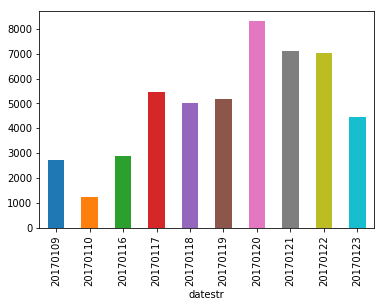

In [7]:
x4_tr, x4_ts = train_test_filenames(data,'An. gambiae', test_dates=['20170110', '20170109']) 

### Culex quinquefasciatus

Data: C. quinquefasciatus.
Read 74599 filenames in 2.29 seconds.
['20161220', '20161219', '20161221']
41552 train filenames, 33047 test filenames


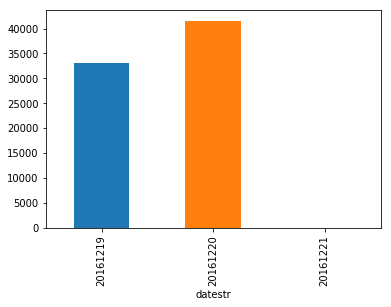

In [8]:
x5_tr, x5_ts = train_test_filenames(data,'C. quinquefasciatus', test_dates=['20161219']) 

### Culex pipiens

Data: C. pipiens.
Read 30415 filenames in 2.34 seconds.
['20161206', '20161205', '20170215', '20170216', '20170220', '20170217', '20170214', '20170213', '20170219', '20170218']
28353 train filenames, 2062 test filenames


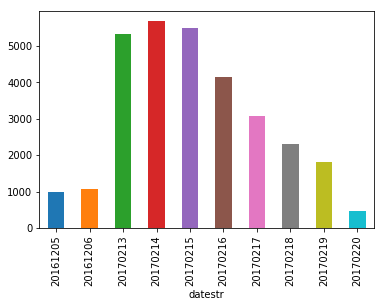

In [9]:
x6_tr, x6_ts = train_test_filenames(data,'C. pipiens', test_dates=['20161206', '20161205']) 

In [10]:
x1_tr, x1_ts = x1_tr.sample(12800), x1_ts.sample(2000)
x2_tr, x2_ts = x2_tr.sample(12800), x2_ts.sample(2000)
x3_tr, x3_ts = x3_tr.sample(12800), x3_ts.sample(2000)
x4_tr, x4_ts = x4_tr.sample(12800), x4_ts.sample(2000)
x5_tr, x5_ts = x5_tr.sample(12800), x5_ts.sample(2000)
x6_tr, x6_ts = x6_tr.sample(12800), x6_ts.sample(2000)

## Creating TRAIN/VAL/TEST sets

In [11]:
X_train = pd.concat([x1_tr, x2_tr, x3_tr, x4_tr, x5_tr, x6_tr], axis=0)
X_test = pd.concat([x1_ts, x2_ts, x3_ts, x4_ts, x5_ts, x6_ts], axis=0)

In [12]:
y_train = X_train.apply(lambda x: x.split('/')[len(BASE_DIR.split('/'))])
y_test = X_test.apply(lambda x: x.split('/')[len(BASE_DIR.split('/'))])

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [14]:
X_test = X_test.tolist()

In [15]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
X_train,y_train = shuffle(X_train.tolist(),y_train.tolist(), random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [16]:
keys = pd.Series(le.inverse_transform(y_train)).value_counts().index.tolist()
values = pd.Series(y_train).value_counts().index.tolist()
mapping = dict(zip(keys, values))
sorted(mapping.items(), key=lambda x: x[1])

[('Ae. aegypti', 0),
 ('Ae. albopictus', 1),
 ('An. arabiensis', 2),
 ('An. gambiae', 3),
 ('C. pipiens', 4),
 ('C. quinquefasciatus', 5)]

In [17]:
df_train = make_df_parallel(setting='psd_dB', names=X_train+X_val)
# df_val = make_df_parallel(setting='psd_dB', names=X_val)
df_test = make_df_parallel(setting='psd_dB', names=X_test)

In [18]:
y_train = y_train + y_val

## MODELING

## k-Nearest Neighbors

In [19]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()#with_std=True)

x_train = sc.fit_transform(df_train.values)
x_test = sc.fit_transform(df_test.values)


In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

# grid_params = {
#     'n_neighbors': [11, 13, 15],
#     'weights': ['uniform', 'distance'],
#     'metric': ['euclidean', 'manhattan']
# }

# gs = GridSearchCV(KNeighborsClassifier(),
#                  grid_params,
#                  verbose=1,
#                  cv=5,
#                  n_jobs=-1)

# gs_results = gs.fit(x_train, y_train)

In [21]:
# plt.plot(x_train[0])

In [22]:
import sklearn
sklearn.__version__

'0.21.3'

In [32]:
# from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# classifier = LogisticRegression( solver='saga', penalty='elasticnet', l1_ratio=0.3, multi_class='ovr', max_iter=300, n_jobs=-1)
# from sklearn.neural_network import MLPClassifier
# classifier = MLPClassifier(solver='lbfgs', alpha=1e-5, max_iter=1000, activation='relu',
#                             hidden_layer_sizes=(30,), learning_rate='adaptive', verbose=True)

classifier = RandomForestClassifier(n_estimators=320, n_jobs=-1, )

classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=320,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

Balanced Accuracy Score: 0.16666666666666666


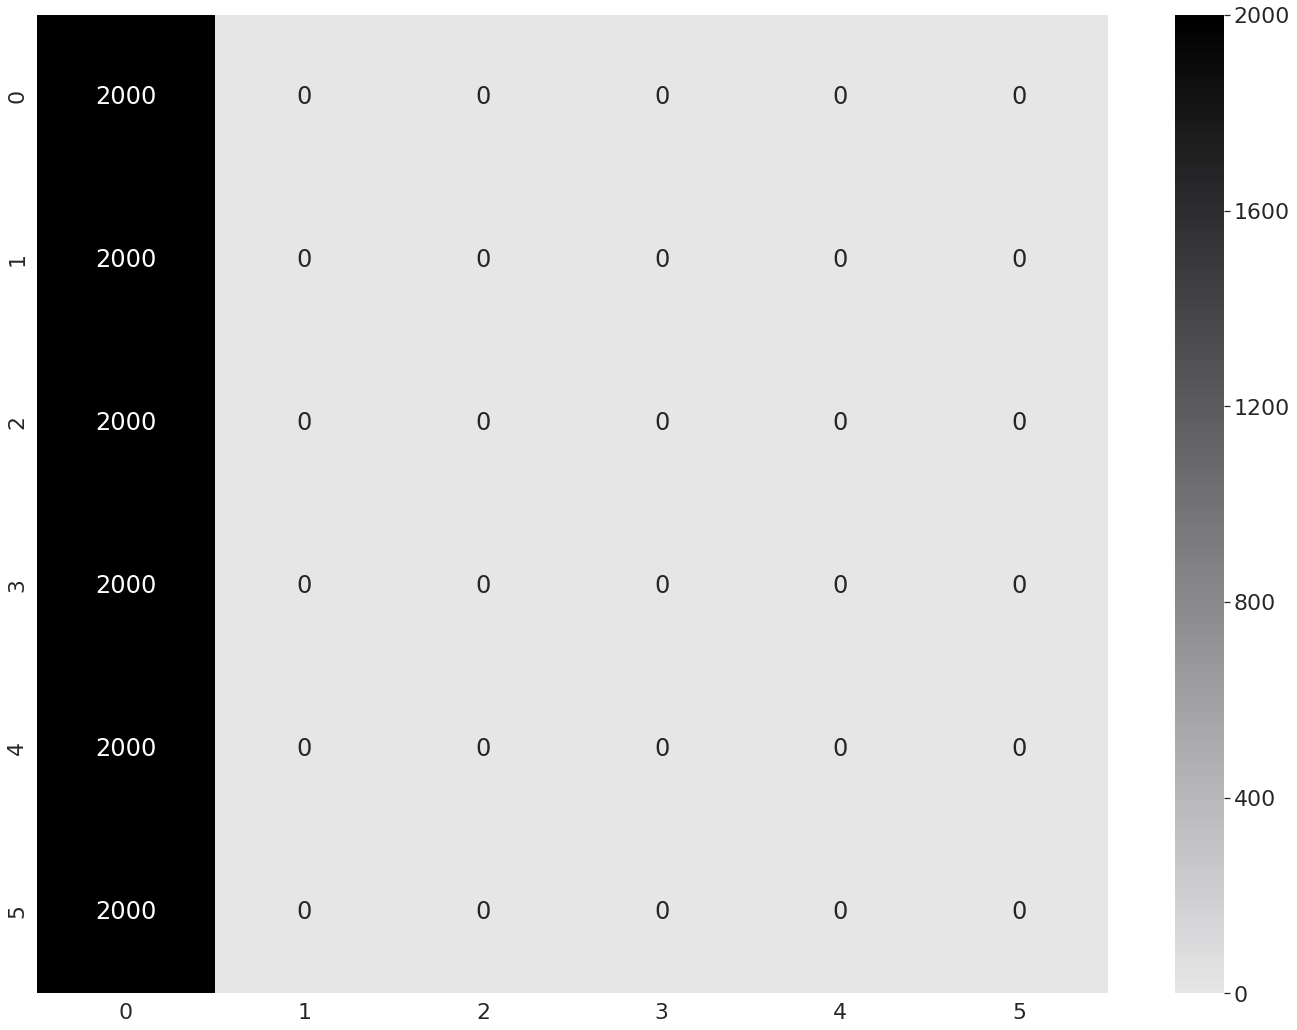

In [33]:
# classifier = gs_results.best_estimator_

# classifier.fit(df_train.values, y_train)
y_pred = classifier.predict(df_test.values)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,balanced_accuracy_score
import seaborn as sns
sns.set(font_scale=2.) 

# Calculating confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Creating heatmap
plt.figure(figsize=(24,18))
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(cm, annot=True, fmt='g', cmap=cmap)

# Saving figure
# plt.savefig('/home/kalfasyan/Desktop/confusion_mat_knn.eps', format='eps')
ac = balanced_accuracy_score(y_test, y_pred)
print('Balanced Accuracy Score: {}'.format(ac))

## XGBoost

In [23]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

parameters = {'max_depth': range (2, 4, 1),
              'n_estimators': range(180, 320, 40),
              'learning_rate': [0.1, 0.2, 0.3],
              'gamma': [0, 0.5, 1, 2, 5]}

estimator = XGBClassifier(param_grid=parameters,
                          random_state=0,
                          seed=42,
                          verbose=True)

gs_xgb = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    n_jobs = -1,
    cv = 5,
    verbose=True)

gs_xgb.fit(x_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed: 35.2min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed: 234.3min
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed: 579.7min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed: 825.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:...g_lambda=1, scale_pos_weight=1,
       seed=42, silent=None, subsample=1, verbose=True, verbosity=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': range(2, 4), 'n_estimators': range(180, 320, 40), 'learning_rate': [0.1, 0.2, 0.3], 'gamma': [0, 0.5, 1, 2, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [28]:
gs_xgb.cv_results_

/home/kalfasyan/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/kalfasyan/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/kalfasyan/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/kalfasyan/.local/lib/pyth

{'mean_fit_time': array([ 787.82759871,  961.85035539, 1139.39580498, 1311.49903884,
        1182.6696281 , 1450.61413312, 1710.92347059, 1971.74320059,
         793.64125867,  964.92748652, 1136.53206482, 1312.12419991,
        1179.4246644 , 1449.7087966 , 1703.6005414 , 1958.60685668,
         786.89121876,  959.57538576, 1133.17990108, 1305.73482308,
        1175.39453917, 1442.20297718, 1699.03064671, 1960.44062834,
         793.3100698 ,  966.86672287, 1138.91073785, 1316.43883786,
        1186.81297522, 1454.69624114, 1720.86868005, 1985.10891366,
         791.18467231,  961.91085234, 1127.91625018, 1308.66281533,
        1182.72362247, 1443.73385696, 1706.41090579, 1967.34489803,
         786.65228672,  956.64742894, 1131.69136353, 1306.63591495,
        1173.46410742, 1437.76661344, 1701.42551599, 1954.36416311,
         791.2877737 ,  965.70366983, 1139.01580038, 1308.13386202,
        1182.44677215, 1448.40829034, 1703.82034101, 1970.657899  ,
         789.75835443,  958.081

Balanced Accuracy Score: 0.5256666666666666


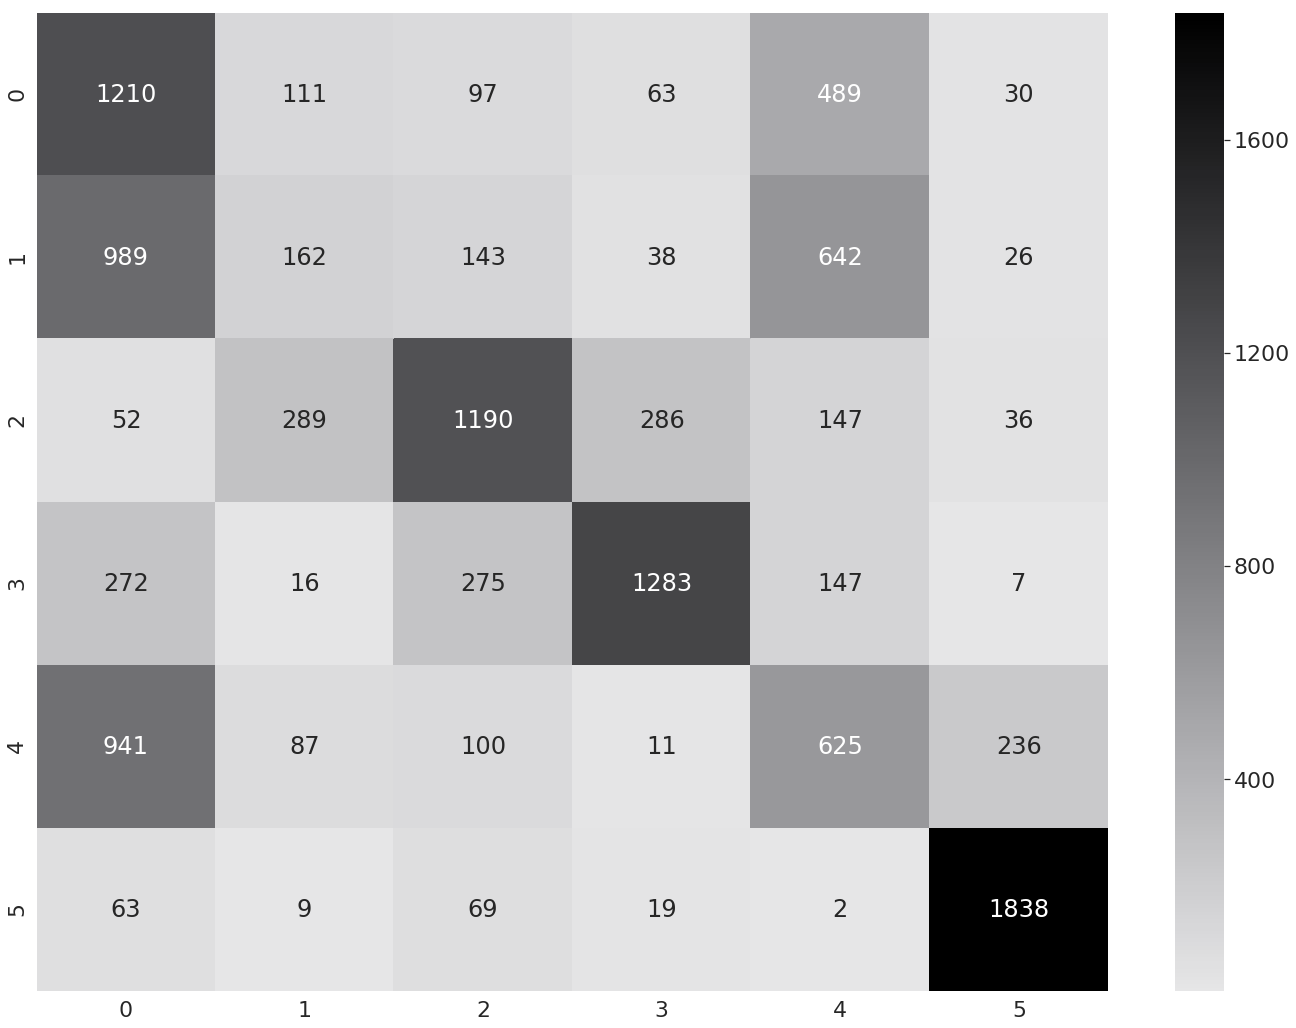

In [24]:
classifier = gs_xgb.best_estimator_

classifier.fit(df_train.values, y_train)
y_pred = classifier.predict(df_test.values)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,balanced_accuracy_score
import seaborn as sns
sns.set(font_scale=2.) 

# Calculating confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Creating heatmap
plt.figure(figsize=(24,18))
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(cm, annot=True, fmt='g', cmap=cmap)

# Saving figure
plt.savefig('/home/kalfasyan/Desktop/confusion_mat_xgboost.eps', format='eps')
ac = balanced_accuracy_score(y_test, y_pred)
print('Balanced Accuracy Score: {}'.format(ac))

# from yellowbrick.model_selection import FeatureImportances
# model = classifier
# viz = FeatureImportances(model);
# viz.fit(df_test.values, y_test);

# sub = pd.DataFrame(np.vstack((viz.features_,viz.feature_importances_))).T
# sub.columns = ['features','importances']
# sns.lineplot(x=sub.features, y=sub.importances)

## Random forest

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import xgboost
from utils import get_classifier

# clf_name = 'rf'
# classifier = get_classifier(clf_name)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 250, 
                                    n_jobs=-1, 
#                                     class_weight={0:50., 1:1., 2:1., 3:1.}, 
                                    random_state = 0)

classifier.fit(df_train.values, y_train)
y_pred = classifier.predict(df_test.values)
ac = accuracy_score(y_test, y_pred)
print("Name: %s, ac: %f" % ('model', ac))


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,balanced_accuracy_score
import seaborn as sns
sns.set(font_scale=2.) 

# Calculating confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Creating heatmap
plt.figure(figsize=(24,18))
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(cm, annot=True, fmt='g', cmap=cmap)

# Saving figure
plt.savefig('/home/kalfasyan/Desktop/confusion_mat.eps', format='eps')
ac = balanced_accuracy_score(y_test, y_pred)
print('Balanced Accuracy Score: {}'.format(ac))

# from yellowbrick.model_selection import FeatureImportances
# model = classifier
# viz = FeatureImportances(model);
# viz.fit(df_test.values, y_test);

# sub = pd.DataFrame(np.vstack((viz.features_,viz.feature_importances_))).T
# sub.columns = ['features','importances']
# sns.lineplot(x=sub.features, y=sub.importances)